In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
#Define the available data files
train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

We can see that other than Transported and PassengerId, the rest of the columns have Null values.
We shall try to fill the columns we choose to use with the average value.

In [5]:
#First we fill the missing values 
train['CryoSleep'].value_counts(normalize=True)

False    0.641694
True     0.358306
Name: CryoSleep, dtype: float64

In [6]:
a = train['CryoSleep'].isna().sum()
b = train['CryoSleep'].count()
c= a+b
#Percentage of null values in CryoSleep Column
print('Percentage of null values in CryoSleep Column: ', (a/c)*100 )
print('Number of null values in CryoSleep Column:', a)

Percentage of null values in CryoSleep Column:  2.4962613597147127
Number of null values in CryoSleep Column: 217


In [7]:
#So we are going to fill the NaN values in CryoSleep column evenly with both true and false values
train[['CryoSleep']] = train[['CryoSleep']].fillna(value=False, limit=109)
train[['CryoSleep']] = train[['CryoSleep']].fillna(value=True, limit=108)
print('Number of null values in CryoSleep Column:', train['CryoSleep'].isna().sum())

Number of null values in CryoSleep Column: 0


In [8]:
a1 = train['VIP'].isna().sum()
b1 = train['VIP'].count()
c1 = a1+b1
#Percentage of null values in VIP Column
print('Percentage of null values in VIP Column: ', (a1/c1)*100 )
print('Number of null values in VIP Column:', a1)

Percentage of null values in VIP Column:  2.3352122397331185
Number of null values in VIP Column: 203


In [9]:
train['VIP'].value_counts(normalize=True)

False    0.976561
True     0.023439
Name: VIP, dtype: float64

In [10]:
#So we are going to fill the NaN values in VIP column evenly with both true and false values
train[['VIP']] = train[['VIP']].fillna(value=False, limit=102)
train[['VIP']] = train[['VIP']].fillna(value=True, limit=101)
print('Number of null values in VIP Column:', train['VIP'].isna().sum())

Number of null values in VIP Column: 0


In [11]:
#Next we fill NaN values in Age
g = train['Age'].isna().sum()
print('Null values in Age: ', g)
print('Meadian of Age excluding NaN:', train['Age'].median(skipna=True))
train[['Age']] = train[['Age']].fillna(value=train['Age'].median(skipna=True))
print('Null values in Age now: ', g)

Null values in Age:  179
Meadian of Age excluding NaN: 27.0
Null values in Age now:  179


In [12]:
#Now we are going to fill the Nan values in RoomSerivce, FoodCourt, ShopingMall, VRdeck with 0.0
train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0.0)
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep         0
Cabin           199
Destination     182
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [13]:
#Let's work on the HomePlanet Column
print('NaN values in Homeplanet: ', train['HomePlanet'].isna().sum())
train['HomePlanet'].value_counts(normalize=True)

NaN values in Homeplanet:  201


Earth     0.541922
Europa    0.250942
Mars      0.207136
Name: HomePlanet, dtype: float64

In [14]:
j = int((train['HomePlanet'].isna().sum())/3)
train[['HomePlanet']] = train[['HomePlanet']].fillna(value='Earth', limit=j)
train[['HomePlanet']] = train[['HomePlanet']].fillna(value='Europa', limit=j)
train[['HomePlanet']] = train[['HomePlanet']].fillna(value='Mars', limit=j)
print('NaN values in Homeplanet: ', train['HomePlanet'].isna().sum()) 

NaN values in Homeplanet:  0


In [15]:
train.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination     182
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [16]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


We are now going to forward convert values of our feature columns from string to integers to better fit into our model.
False = 0 
True = 1
Earth = 1
Europa = 2
Mars = 3

In [17]:
train.replace(to_replace=[False, True, 'Earth', 'Europa', 'Mars'], value=[0, 1, 1, 2, 3], inplace=True)
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,2,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,1,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,2,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,2,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,1,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1


**FEATURE SELECTION AND DATA NORMALIZATION**

In [18]:
#Let's filter out our feature columns
X = train[['HomePlanet', 'CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
X[0:5]

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,2,0,39.0,0,0.0,0.0,0.0,0.0,0.0
1,1,0,24.0,0,109.0,9.0,25.0,549.0,44.0
2,2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0
3,2,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0
4,1,0,16.0,0,303.0,70.0,151.0,565.0,2.0


In [19]:
import matplotlib.pyplot as plt
import itertools
from sklearn import preprocessing 

In [20]:
y = train['Transported'].values
y[0:5]

array([0, 1, 0, 0, 1])

In [21]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.40874379, -0.75290832,  0.71194537, -0.18906103, -0.33310466,
        -0.28102673, -0.28357863, -0.2706259 , -0.26300329],
       [-0.8410662 , -0.75290832, -0.33403748, -0.18906103, -0.16807343,
        -0.27538657, -0.24177071,  0.21715825, -0.22420468],
       [ 0.40874379, -0.75290832,  2.03685698,  5.28929737, -0.2680006 ,
         1.95999765, -0.28357863,  5.69562289, -0.21979574],
       [ 0.40874379, -0.75290832,  0.29355223, -0.18906103, -0.33310466,
         0.5230097 ,  0.33685096,  2.68717637, -0.09281847],
       [-0.8410662 , -0.75290832, -0.891895  , -0.18906103,  0.12565187,
        -0.2371588 , -0.03105877,  0.23137418, -0.26123971]])

In [22]:
from sklearn.model_selection import train_test_split
#Let's split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (6519, 9) (6519,)
Test set:  (2174, 9) (2174,)


In [23]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.5).fit(X_train, y_train)
LR_model

LogisticRegression(C=0.5)

In [24]:
yhat = LR_model.predict(X_test)
yhat

array([0, 1, 0, ..., 1, 1, 1])

In [25]:
from sklearn.metrics import accuracy_score
acc_LR = accuracy_score(yhat, y_test)
acc_LR

0.7856485740570377

**DECISION TREE CLASSIFIER**

In [26]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion='entropy', max_depth=6)
DT_model.fit(X_train, y_train)
DT_model

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [27]:
yhat_DT = DT_model.predict(X_test)
yhat_DT

array([1, 1, 0, ..., 1, 1, 1])

In [28]:
acc_DT = accuracy_score(yhat_DT, y_test)
acc_DT

0.7723091076356946

**K NEAREST NEIGHBOR**

In [29]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
#Train model and predict
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
kNN_model

KNeighborsClassifier(n_neighbors=4)

In [30]:
#Best K
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx = [];
for n in range (1, Ks):
    
    #Test and Predict 
    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat_kNN = kNN_model.predict(X_test)
    
    mean_acc[n-1] = np.mean(yhat_kNN==y_test);
    std_acc[n-1] = np.std(yhat_kNN==y_test)/np.sqrt(y_test.shape[0])
    
mean_acc

array([0.70791168, 0.72125115, 0.75206992, 0.75160994, 0.76632935,
       0.76310948, 0.77736891, 0.77782889, 0.78380865, 0.77322907,
       0.77598896, 0.76770929, 0.77138914, 0.77046918, 0.77460902,
       0.77690892, 0.77414903, 0.77414903, 0.77736891])

In [31]:
#Building model with the best k 9:
k = 9
KNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
KNN_model

KNeighborsClassifier(n_neighbors=9)

In [32]:
#Predict and check accuracy 
yhat_KNN = KNN_model.predict(X_test)
yhat_KNN

array([0, 1, 0, ..., 1, 1, 1])

In [33]:
acc_KNN = accuracy_score(yhat_KNN, y_test)
acc_KNN

0.7838086476540939

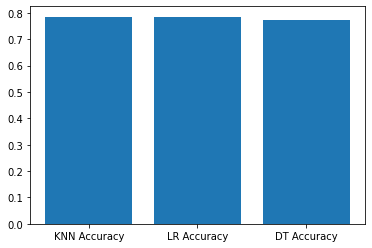

In [34]:
#Let's plot a graph showing accuracy score diffrence accross diffrent classification models
TY = np.array([acc_KNN, acc_LR, acc_DT])
TX = np.array(['KNN Accuracy', 'LR Accuracy', 'DT Accuracy'])

plt.bar(TX,TY)
plt.show()

**CLEANING AND EXTRACTION OF REQUIRED FEATURES FROM TEST SET**

In [35]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [36]:
#So we are going to fill the NaN values in CryoSleep column evenly with both true and false values
test[['CryoSleep']] = test[['CryoSleep']].fillna(value=False, limit=47)
test[['CryoSleep']] = test[['CryoSleep']].fillna(value=True, limit=46)
print('Number of null values in CryoSleep Column:', test['CryoSleep'].isna().sum())

Number of null values in CryoSleep Column: 0


In [37]:
#So we are going to fill the NaN values in VIP column evenly with both true and false values
test[['VIP']] = test[['VIP']].fillna(value=False, limit=47)
test[['VIP']] = test[['VIP']].fillna(value=True, limit=46)
print('Number of null values in VIP Column:', test['VIP'].isna().sum())

Number of null values in VIP Column: 0


In [38]:
#Next we fill NaN values in Age
gt = test['Age'].isna().sum()
print('Null values in Age: ', gt)
print('Meadian of Age excluding NaN:', test['Age'].median(skipna=True))
test[['Age']] = test[['Age']].fillna(value=test['Age'].median(skipna=True))

Null values in Age:  91
Meadian of Age excluding NaN: 26.0


In [39]:
#Now we are going to fill the Nan values in RoomSerivce, FoodCourt, ShopingMall, VRdeck with 0.0
test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0.0)
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep         0
Cabin           100
Destination      92
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
dtype: int64

In [40]:
j = int((test['HomePlanet'].isna().sum())/3)
test[['HomePlanet']] = test[['HomePlanet']].fillna(value='Earth', limit=j)
test[['HomePlanet']] = test[['HomePlanet']].fillna(value='Europa', limit=j)
test[['HomePlanet']] = test[['HomePlanet']].fillna(value='Mars', limit=j)
print('NaN values in Homeplanet: ', test['HomePlanet'].isna().sum()) 

NaN values in Homeplanet:  0


In [41]:
test.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination      92
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
dtype: int64

**NORMALIZATION OF DATA SET**

In [42]:
test.replace(to_replace=[False, True, 'Earth', 'Europa', 'Mars'], value=[0, 1, 1, 2, 3], inplace=True)
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,1,1,G/3/S,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,1,0,F/4/S,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,2,1,C/0/S,55 Cancri e,31.0,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,2,0,C/1/S,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,1,0,F/5/S,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [43]:
#Let's filter out our feature columns
test_X = test[['HomePlanet', 'CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]
test_X[0:5]

,HomePlanet,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,1,27.0,0,0.0,0.0,0.0,0.0,0.0
1,1,0,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,2,1,31.0,0,0.0,0.0,0.0,0.0,0.0
3,2,0,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,1,0,20.0,0,10.0,0.0,635.0,0.0,0.0


In [44]:
test_X = preprocessing.StandardScaler().fit(test_X).transform(test_X)
test_X

array([[-0.84515116,  1.29997581, -0.11414662, ..., -0.31217285,
        -0.26784148, -0.24671194],
       [-0.84515116, -0.76924508, -0.68431317, ..., -0.31217285,
         2.28750433, -0.24671194],
       [ 0.38476089,  1.29997581,  0.17093665, ..., -0.31217285,
        -0.26784148, -0.24671194],
       ...,
       [ 1.61467293,  1.29997581, -0.18541744, ..., -0.31217285,
        -0.26784148, -0.24671194],
       [ 0.38476089, -0.76924508, -0.18541744, ..., -0.31217285,
        -0.26784148,  0.17647949],
       [-0.84515116,  1.29997581,  1.02618647, ..., -0.31217285,
        -0.26784148, -0.24671194]])

In [45]:
#Now we will fit the model with the complete train set and predict the test data set
#LogisticRegression
LR_Model = LogisticRegression(C=0.5).fit(X, y)
LR_Model

LogisticRegression(C=0.5)

In [46]:
#Now let's predict for LogisticRegression
LR_pred = LR_Model.predict(test_X)
LR_pred

array([1, 0, 1, ..., 1, 1, 1])

In [47]:
result = test[['PassengerId']].reset_index(drop=True)
result['Transported'] = LR_pred
result.replace(to_replace=[1,0], value=[True, False], inplace=True)
result.to_csv('LR_submission.csv', index=False)

In [48]:
#Building model with Decision Tree Classifier
DT_Model = DecisionTreeClassifier(criterion='entropy', max_depth=6)
DT_Model = DT_Model.fit(X, y)
DT_Model

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [49]:
#Runing Prediction with Decision Tree model
DT_pred = DT_Model.predict(test_X)
DT_pred

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
result_DT = test[['PassengerId']].reset_index(drop=True)
result_DT['Transported'] = DT_pred
result_DT.replace(to_replace=[1,0], value=[True, False], inplace=True)
result_DT.to_csv('DT_submission.csv', index=False)

In [51]:
#For our final classification prediction we use K Nearest Neighbors
#Building model with our best k = 9
k = 9
KNN_Model = KNeighborsClassifier(n_neighbors=k).fit(X, y)
KNN_Model

KNeighborsClassifier(n_neighbors=9)

In [52]:
KNN_pred = KNN_Model.predict(test_X)
KNN_pred

array([0, 0, 1, ..., 1, 1, 0])

In [53]:
result_KNN = test[['PassengerId']].reset_index(drop=True)
result_KNN['Transported'] = KNN_pred
result_KNN.replace(to_replace=[1,0], value=[True, False], inplace=True)
result_KNN.to_csv('KNN_submission.csv', index=False)